In [3]:
import pandas as pd

data_load = pd.read_csv(r"C:\Users\emre-\Desktop\fault_slip_model.dat")
print(data_load.head())

  p1.x(km)     p1.y(km)      p1.z(km)    p2.x     p2.y      p2.z   p3.x     p3.y      p3.z   strike_slip(m)  dip_slip(m) 
0  255.6784 4036.1536 -1.4178 253.0953 4031.0788 ...                                                                     
1  277.6261 4076.1530 -11.3426 279.4188 4081.9655...                                                                     
2  238.3843 4013.7689 0.0000 237.3153 4013.0888 -...                                                                     
3  377.2573 4183.2589 -14.8872 370.3664 4179.0238...                                                                     
4  247.0376 4022.6685 -1.4178 242.1342 4017.6075 ...                                                                     


In [4]:
import csv

with open(r"C:\Users\emre-\Desktop\final_data_csv.csv", "w", newline='') as write_data:
    csv_writer = csv.writer(write_data)

    with open(r"C:\Users\emre-\Desktop\fault_slip_model.dat", "r") as read_data:
        for line in read_data:
            values = line.strip().split()
            csv_writer.writerow(values)

In [5]:
df = pd.read_csv(r"C:\Users\emre-\Desktop\final_data_csv.csv")
print(df.head())

   p1.x(km)   p1.y(km)  p1.z(km)      p2.x       p2.y     p2.z      p3.x  \
0  255.6784  4036.1536   -1.4178  253.0953  4031.0788   0.0000  258.4339   
1  277.6261  4076.1530  -11.3426  279.4188  4081.9655 -14.8872  275.0329   
2  238.3843  4013.7689    0.0000  237.3153  4013.0888  -1.4178  236.4213   
3  377.2573  4183.2589  -14.8872  370.3664  4179.0238 -18.4318  370.5854   
4  247.0376  4022.6685   -1.4178  242.1342  4017.6075  -1.4178  244.1069   

        p3.y     p3.z  strike_slip(m)  dip_slip(m)  
0  4040.9879   0.0000          2.8179      -0.8545  
1  4071.8539 -14.8872          1.0866      -0.3544  
2  4012.1677   0.0000          0.0000       0.0000  
3  4178.7224 -14.8872          1.1275      -0.0814  
4  4019.5926  -2.8357          0.2906      -0.2778  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847 entries, 0 to 1846
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   p1.x(km)        1847 non-null   float64
 1   p1.y(km)        1847 non-null   float64
 2   p1.z(km)        1847 non-null   float64
 3   p2.x            1847 non-null   float64
 4   p2.y            1847 non-null   float64
 5   p2.z            1847 non-null   float64
 6   p3.x            1847 non-null   float64
 7   p3.y            1847 non-null   float64
 8   p3.z            1847 non-null   float64
 9   strike_slip(m)  1847 non-null   float64
 10  dip_slip(m)     1847 non-null   float64
dtypes: float64(11)
memory usage: 158.9 KB


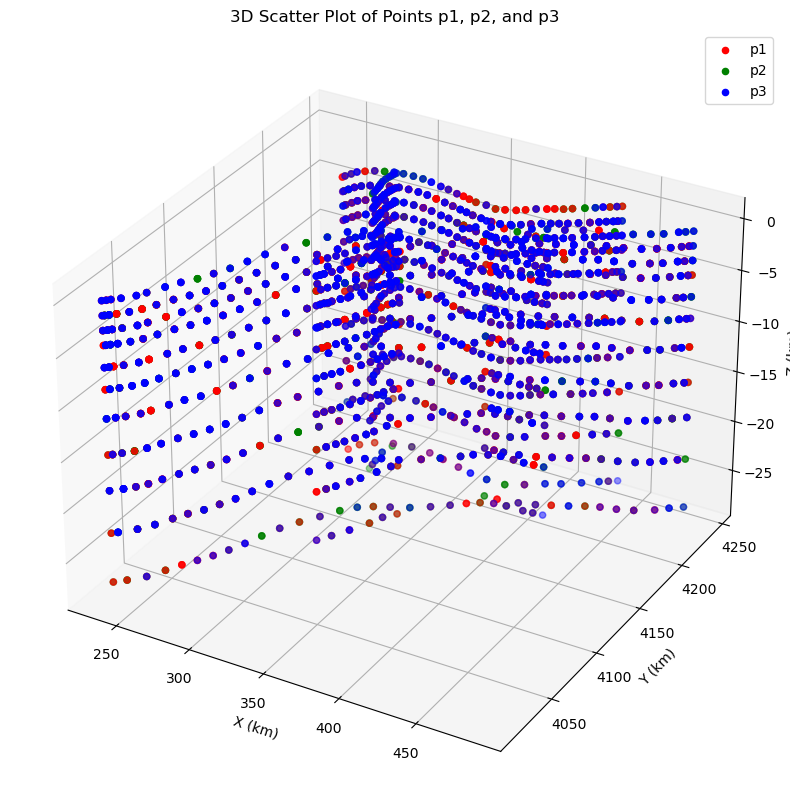

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

p1 = df[['p1.x(km)', 'p1.y(km)', 'p1.z(km)']].values
p2 = df[['p2.x', 'p2.y', 'p2.z']].values
p3 = df[['p3.x', 'p3.y', 'p3.z']].values

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(p1[:, 0], p1[:, 1], p1[:, 2], c='r', marker='o', label='p1')
ax.scatter(p2[:, 0], p2[:, 1], p2[:, 2], c='g', marker='o', label='p2')
ax.scatter(p3[:, 0], p3[:, 1], p3[:, 2], c='b', marker='o', label='p3')

ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('3D Scatter Plot of Points p1, p2, and p3')
ax.legend()

plt.show()

c:\Users\emre-\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\emre-\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


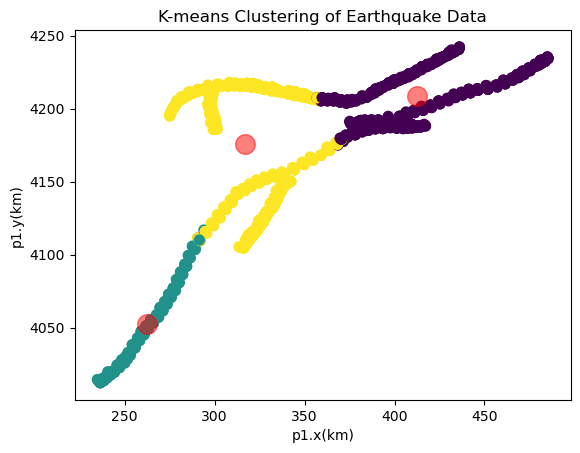

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = df[['p1.x(km)', 'p1.y(km)', 'p1.z(km)', 'p2.x', 'p2.y', 'p2.z', 'p3.x', 'p3.y', 'p3.z', 'strike_slip(m)', 'dip_slip(m)']]

kmeans = KMeans(n_clusters=3) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

plt.scatter(X['p1.x(km)'], X['p1.y(km)'], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('p1.x(km)')
plt.ylabel('p1.y(km)')
plt.title('K-means Clustering of Earthquake Data')
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

reg = LinearRegression()
X_regression = df.drop(['p1.z(km)', 'p2.z', 'p3.z'], axis=1)
y_regression = df[['p1.z(km)', 'p2.z', 'p3.z']] 

X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

reg.fit(X_train, y_train)
prediction = reg.predict(X_test)

r2 = r2_score(y_test, prediction)
print("R^2 Score:", r2)

mae = mean_absolute_error(y_test, prediction)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(y_test, prediction, squared=False)
print("Root Mean Squared Error:", rmse)

R^2 Score: 0.18037774070106552
Mean Absolute Error: 5.673808625396813
Mean Squared Error: 45.122721764479365
Root Mean Squared Error: 6.717235281676881


Analysis of Turkey-Syria Earthquake Sequence Data

Introduction:

The provided dataset contains information about the Turkey-Syria earthquake sequence, including coordinates of three points (p1, p2, and p3), their respective strike and dip slip measurements, and depth information. The goal is to analyze the data and understand the characteristics of the earthquake sequence.

Data Exploration:

The dataset consists of five columns for each point (p1, p2, and p3) representing their coordinates in kilometers (x, y, z), strike slip (m), and dip slip (m).
Each row represents a different earthquake event in the sequence.

Data Visualization:

Scatter plots in 3D space were created to visualize the coordinates of points p1, p2, and p3 for each earthquake event.
The plots provide insights into the spatial distribution of the earthquake events and the relative positions of the points.

Linear Regression Analysis:

Linear regression analysis was performed to predict the depth (z-coordinate) of each point (p1, p2, and p3) based on their coordinates (x, y) and slip measurements (strike slip and dip slip).
The dataset was split into training and testing sets, and a linear regression model was trained using the training data.
The performance of the model was evaluated using metrics such as R^2 score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
The model achieved an R^2 score of approximately 0.18, indicating that it explains only 18% of the variance in the depth of the earthquake points.
The MAE, MSE, and RMSE values were also calculated to assess the accuracy and precision of the model predictions.

Conclusion:

The linear regression model provided limited predictive power in estimating the depth of earthquake points based on their coordinates and slip measurements.
The relatively low R^2 score and the magnitude of errors suggest that the model may benefit from further refinement or alternative modeling approaches.
Additional features, model complexity adjustments, and regularization techniques could be explored to improve the model's performance and enhance its predictive accuracy.
